<center>
  <h1 style="font-family: 'Times New Roman', Times, serif; font-size: 60px;">DAA</h1>
  <h2 style="font-family: 'Times New Roman', Times, serif; font-size: 40px;">Removing Features and Models</h2>
</center>

<h3 style="font-family: 'Times New Roman'">Import Libraries</h3>

In [1]:
# Import necessary libraries
import pandas as pd                                        # Import pandas for data manipulation and analysis
import numpy as np                                         # Import numpy for numerical computations
import matplotlib.pyplot as plt                            # Import matplotlib for data visualization
import seaborn as sns                                      # Import seaborn for enhanced data visualization
from sklearn.feature_selection import mutual_info_classif  # Import mutual_info_classif for mutual information calculation


<h3 style="font-family: 'Times New Roman'">Load Dataset After Data Exploration and Descriptive Statistics</h3>

In [2]:
# Read data from the CSV file 'Drinking.csv' in the 'Files/Exploration_and_Stats_AfterPP' directory and create a new DataFrame named 'df'.
df = pd.read_csv('Files/Exploration_and_Stats_AfterPP/Drinking.csv')

<h3 style="font-family: 'Times New Roman'">Remove Features</h3>

In [3]:
# Drop specified columns
df = df.drop(columns=['eye_sight_left', 'eye_sight_right', 'bmi', 'sight_right', 'serum_creatinine', 'weight'])

In [4]:
# Assuming 'drinker_or_not' is the target variable
target_variable = 'drinker_or_not'

# Set correlation and mutual information thresholds
correlation_threshold = 0.25
mutual_information_threshold = 0.02

# Calculate correlation matrix
correlation_matrix = df.corr()

# Calculate mutual information
mutual_info = mutual_info_classif(df, df[target_variable], discrete_features='auto', random_state=2024)

# Identify columns to drop based on thresholds
columns_to_drop = []
for column in df.columns:
    corr = abs(correlation_matrix[target_variable][column])
    mutual_info_value = mutual_info[df.columns.get_loc(column)]

    if corr < correlation_threshold and mutual_info_value < mutual_information_threshold:
        columns_to_drop.append(column)

# Drop the selected columns from the DataFrame
df = df.drop(columns=columns_to_drop)

print("Columns to Drop:", columns_to_drop)

Columns to Drop: ['waistline', 'sight_left', 'hear_right', 'diastolic_blood_pressure', 'triglyceride']


<h3 style="font-family: 'Times New Roman'">Models</h3>

Model: XGBoost
CV Accuracy: 0.70881 +- 0.00800
Model: RandomForest
CV Accuracy: 0.66995 +- 0.00895
Model: NaiveBayes
CV Accuracy: 0.69562 +- 0.00822
Model: KNN
CV Accuracy: 0.66818 +- 0.00830
Model: DecisionTreeClassifier
CV Accuracy: 0.62352 +- 0.00837
Model: MLP
CV Accuracy: 0.70947 +- 0.00821
Model: SVC
CV Accuracy: 0.70379 +- 0.00902
Model: GradientBoosting
CV Accuracy: 0.71629 +- 0.00769
Model: ExtraTrees
CV Accuracy: 0.65790 +- 0.00978
Model: Ridge
CV Accuracy: 0.70798 +- 0.00795
Model: SGD
CV Accuracy: 0.61689 +- 0.07376
Model: LogisticRegression
CV Accuracy: 0.71070 +- 0.00761


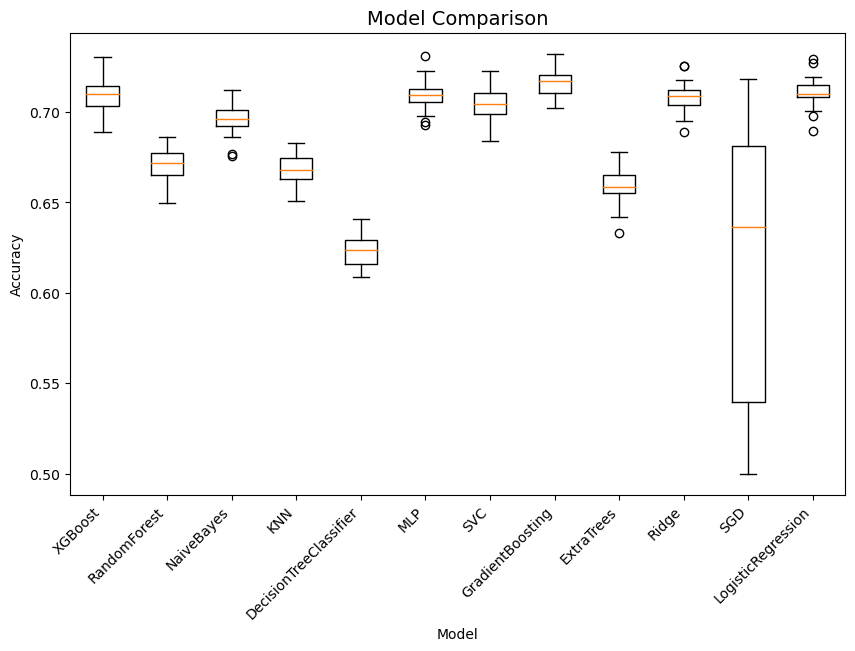

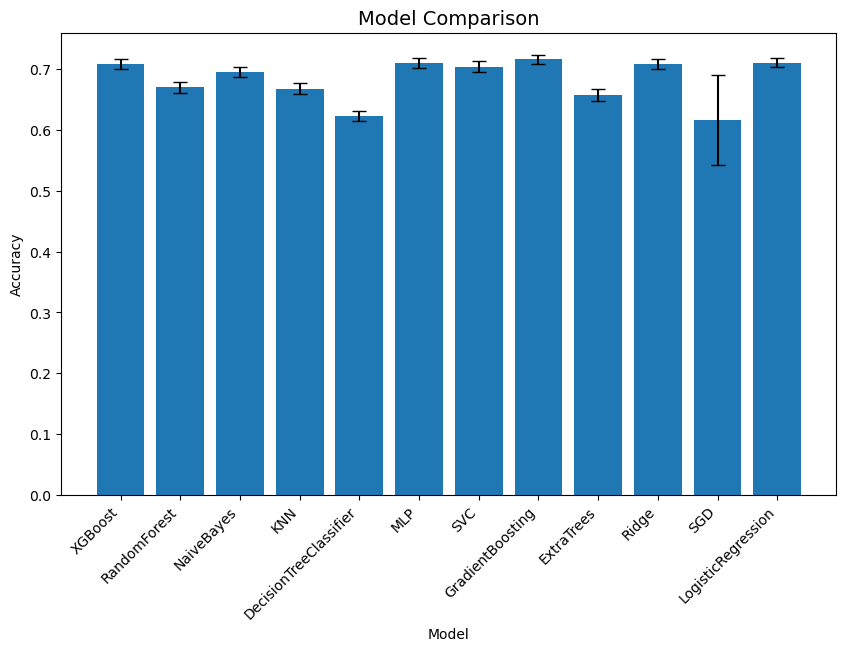

In [8]:
# Import necessary libraries and modules for machine learning
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Define features (X) and target variable (y) from the DataFrame 'df'
X = df.drop(columns=['drinker_or_not'])
y = df['drinker_or_not']

# Define a dictionary of classifier models to be tested
models_to_test = {
    'XGBoost': XGBClassifier(),
    'RandomForest': RandomForestClassifier(),
    'NaiveBayes': GaussianNB(), 
    'KNN': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'MLP': MLPClassifier(),  
    'SVC': SVC(),
    'GradientBoosting': GradientBoostingClassifier(),
    'ExtraTrees': ExtraTreesClassifier(),
    'Ridge': RidgeClassifier(),
    'SGD': SGDClassifier(),
    'LogisticRegression': LogisticRegression()
}

# Define a function for model comparison using cross-validation
def model_comparison(models, x, y):
    results = []
    names = []

    for name, model in models.items():
        # Create a repeated stratified k-fold cross-validator
        rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2022)
        # Perform cross-validation and collect accuracy results
        accuracies = cross_val_score(model, x, y, scoring='accuracy', cv=rskf, n_jobs=-1)
        results.append(accuracies)
        names.append(name)
        # Print the results for each model
        print(f'Model: {name}')
        print(f'CV Accuracy: {np.mean(accuracies):.5f} +- {np.std(accuracies):.5f}')

    return results, names

# Call the model_comparison function and store the results and names
results, names = model_comparison(models_to_test, X, y)

# Plot a boxplot for model comparison
plt.figure(figsize=(10, 6))
comparison = plt.boxplot(results)
plt.xticks(np.arange(1, len(names) + 1), names, rotation=45, ha='right')
plt.title('Model Comparison', size=14)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show(comparison)

# Plot a bar chart for model comparison with error bars
plt.figure(figsize=(10, 6))
plt.bar(names, [np.mean(acc) for acc in results], yerr=[np.std(acc) for acc in results], capsize=5)
plt.title('Model Comparison', size=14)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.show()

<h3 style="font-family: 'Times New Roman'">Save Dataset</h3>

In [9]:
# Save the DataFrame 'df' to a CSV file named 'Drinking.csv' in the 'Files/Models' directory.
df = df.to_csv('Files/Models/Drinking.csv', index = False)